In [9]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt 
import pylab
from scipy.stats import probplot,skew

In [10]:
dataset=pd.read_csv('../Dataset/combined_data.csv')
df=dataset.copy()

In [11]:
df.describe()

,age,number_of_dependents,zip_code,total_population,monthly_ charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,tenure,avg_monthly_gb_download,number_of_referrals,churn_value
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.071134,22139.814568,64.761692,22.958954,2280.381264,1.962182,6.860713,749.099262,3034.379056,32.371149,20.515405,1.951867,0.265370
std,16.750352,0.962802,1856.768045,21152.174407,30.090047,15.448113,2266.220462,7.902614,25.104978,846.660055,2865.204542,24.559481,20.418940,3.001199,0.441561
min,19.000000,0.000000,90001.000000,11.000000,18.250000,0.000000,18.800000,0.000000,0.000000,0.000000,21.360000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,92101.000000,2344.000000,35.500000,9.210000,400.150000,0.000000,0.000000,70.545000,605.610000,9.000000,3.000000,0.000000,0.000000
50%,46.000000,0.000000,93518.000000,17554.000000,70.350000,22.890000,1394.550000,0.000000,0.000000,401.440000,2108.640000,29.000000,17.000000,0.000000,0.000000
75%,60.000000,0.000000,95329.000000,36125.000000,89.850000,36.395000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,55.000000,27.000000,3.000000,1.000000
max,80.000000,9.000000,96150.000000,105285.000000,118.750000,49.990000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,72.000000,85.000000,11.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             7043 non-null   object 
 1   age                                7043 non-null   int64  
 2   under_30                           7043 non-null   object 
 3   senior_citizen                     7043 non-null   object 
 4   number_of_dependents               7043 non-null   int64  
 5   married                            7043 non-null   object 
 6   city                               7043 non-null   object 
 7   zip_code                           7043 non-null   int64  
 8   total_population                   7043 non-null   int64  
 9   phone_service                      7043 non-null   object 
 10  internet_service                   7043 non-null   object 
 11  online_security                    7043 non-null   objec

In [13]:
df['zip_code']=df['zip_code'].astype('O')

# PERCENTAGE OF VARIOUS CATEGORIES OF CUSTOMER_STATUS
There is slight imbalance in the categories

In [18]:
cnt1=0
cnt2=0
cnt3=0
for i in df['customer_status']:
    if i=='Stayed':
        cnt1+=1
    elif i=='Churned':
        cnt2+=1
    else:
        cnt3+=1
print("Percentage of Churned:",cnt2*100/(cnt1+cnt2+cnt3))
print("Percentage of Stayed:",cnt1*100/(cnt1+cnt2+cnt3))
print("Percentage of Joined:",cnt3*100/(cnt1+cnt2+cnt3))
print("No of entries with Class as Churned:",df[df['customer_status']=='Churned'].shape)
print("No of entries with Class as Not Churned:",df[(df['customer_status']=='Stayed') | (df['customer_status']=='Joined') ].shape)

Percentage of Churned: 26.536987079369588
Percentage of Stayed: 67.01689620900184
Percentage of Joined: 6.446116711628568
No of entries with Class as Churned: (1869, 41)
No of entries with Class as Not Churned: (5174, 41)


# CATEGORICAL AND NUMERICAL FEATURES

In [34]:
categorical=[i for i in df.columns if df[i].dtype=='object']
numeric=[i for i in df.columns if df[i].dtype!='object']
print(f"CATEGORICAL:{categorical} \nNo of features:{len(categorical)} \n")
print(f"NUMERICAL:{numeric} \nNo of features:{len(numeric)}\n")
print("Total number of features:",len(categorical)+len(numeric))

CATEGORICAL:['gender', 'under_30', 'senior_citizen', 'married', 'city', 'zip_code', 'phone_service', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'internet_type', 'contract', 'paperless_billing', 'payment_method', 'internet_service.1', 'phone_service.1', 'multiple_lines', 'unlimited_data', 'offer', 'referred_a_friend', 'customer_status', 'churn_reason'] 
No of features:27 

NUMERICAL:['age', 'number_of_dependents', 'total_population', 'monthly_ charges', 'avg_monthly_long_distance_charges', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue', 'tenure', 'avg_monthly_gb_download', 'number_of_referrals', 'churn_value'] 
No of features:14

Total number of features: 41


# SKEWNESS ANALYSIS 

Here Age,total_population, monthly_charges,avg_monthly_long_distance_charges,total_charges,total_refunds, total_long_distance_charges,total_revenue,tenure,avg_monthly_gb_download are continous



Feature: age
Unique values: [37 46 50 78 75 23 67 52 68 43 47 25 58 32 39 72 79 26 30 22 34 42 64 48
 28 33 31 60 69 20 57 19 38 54 35 51 66 61 24 55 59 71 49 40 21 45 29 62
 76 77 73 41 56 80 63 53 44 70 74 36 27 65]


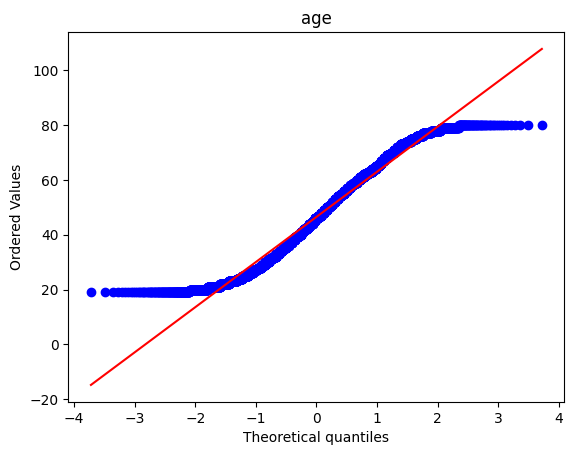



Feature: number_of_dependents
Unique values: [0 3 1 2 4 6 5 9 7 8]


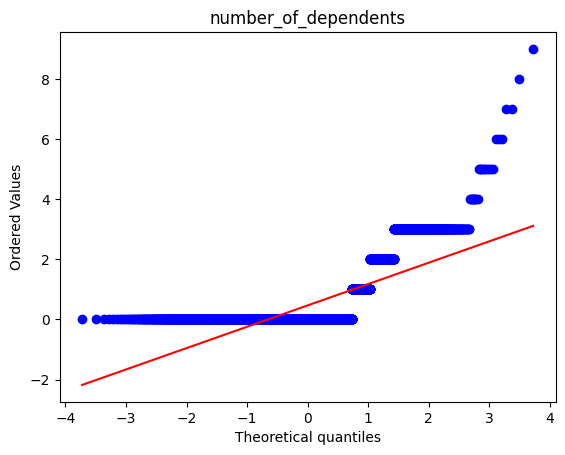



Feature: total_population
Unique values: [ 4498 31297 62069 ... 13027 33038 17409]


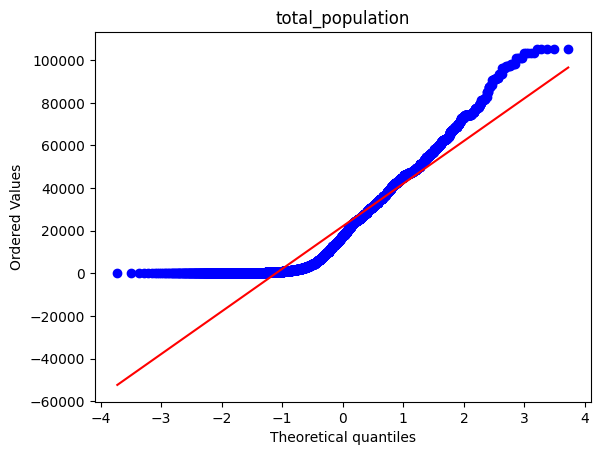



Feature: monthly_ charges
Unique values: [65.6  59.9  73.9  ... 91.75 68.8  67.85]


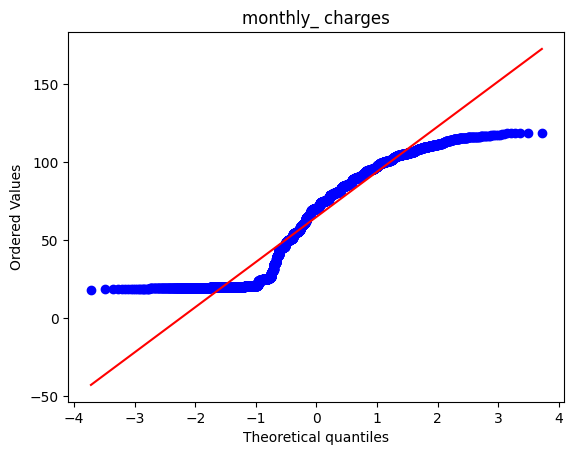



Feature: avg_monthly_long_distance_charges
Unique values: [42.39 10.69 33.65 ... 10.04 25.59  2.01]


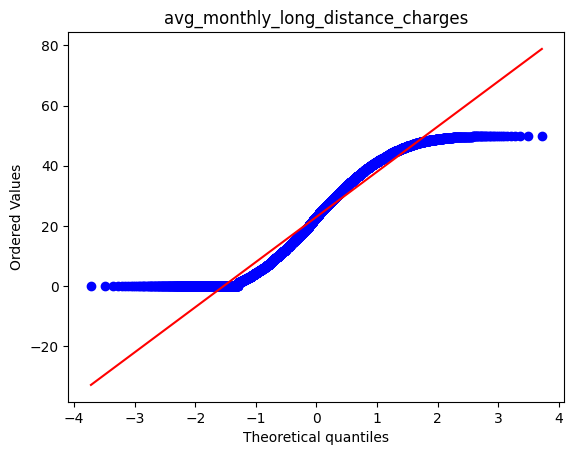



Feature: total_charges
Unique values: [ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]


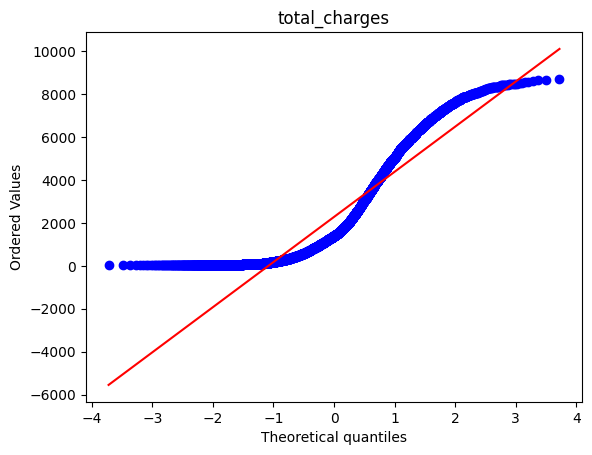



Feature: total_refunds
Unique values: [ 0.   38.33 21.25 30.53 44.42 44.9  12.26  6.11 10.23 13.03 36.02 17.91
  1.01 16.99 25.24 27.01  9.73 44.53 38.46 16.56  4.73 18.88  8.13  8.74
 11.37  1.31 33.8  49.76 16.97 14.21 16.73 49.02  2.28  9.35 41.74 13.01
 27.38 23.97 14.23 18.55  1.48  5.15 33.25 41.33 33.43 22.96 11.45 17.17
 24.99 26.37 38.42 11.72 29.21 45.75 47.79 29.   15.76 17.6  15.17 14.57
 26.32 25.62 20.45 37.06 43.66 28.7  22.34 49.79 46.66  6.26 38.37 49.24
  3.55  7.3  16.96  3.85 34.83 23.39 23.72 33.13 43.76 26.02 40.62 48.54
 10.76 35.34 14.15 12.81 24.07 45.61 16.89  4.18 33.67 17.96 26.99 20.17
 21.81 47.04 12.55 32.65 34.44 36.61 45.44  6.79 48.25 41.66 18.62 20.29
 11.05 15.41 49.37 45.07 36.29 33.24 29.17 29.64  6.65  4.7  33.1  31.05
 42.57 45.38 25.79 11.8  34.67 36.04 39.68 16.38 36.92 24.08  5.83 45.81
 49.06 12.66 41.23 30.14 46.06  3.34 19.31 44.13 35.28 44.17 37.45  3.33
 31.58  2.62 36.66 38.84 17.14 12.48 38.65 11.83 22.55 16.27  8.88 18.85
 46.99 44.6

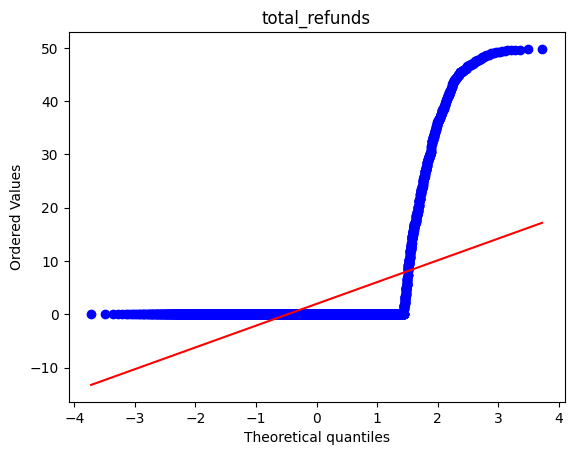



Feature: total_extra_data_charges
Unique values: [  0  10  20  40 120 100 130 110  60 140  50  80 150  70  30  90]


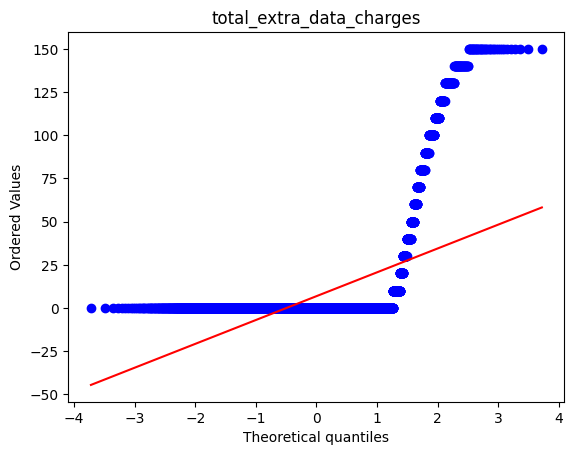



Feature: total_long_distance_charges
Unique values: [381.51  96.21 134.6  ... 356.4   37.24 142.04]


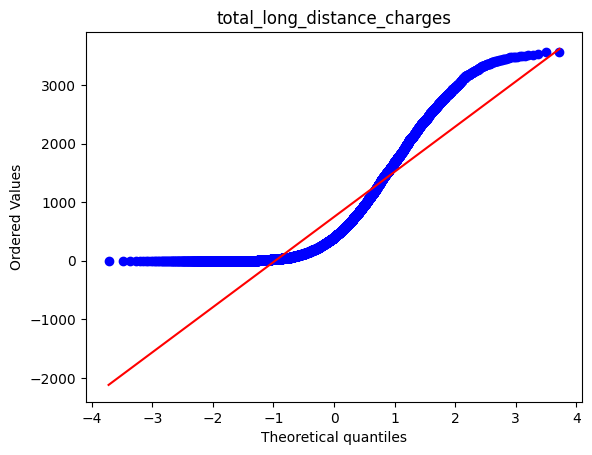



Feature: total_revenue
Unique values: [ 974.81  610.28  415.45 ...  129.99 4769.69 3707.6 ]


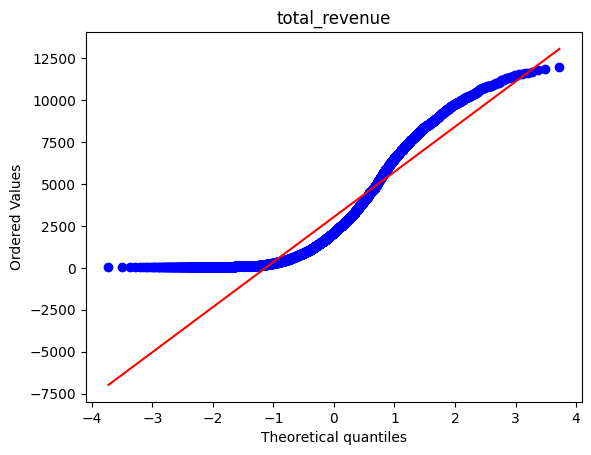



Feature: tenure
Unique values: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]


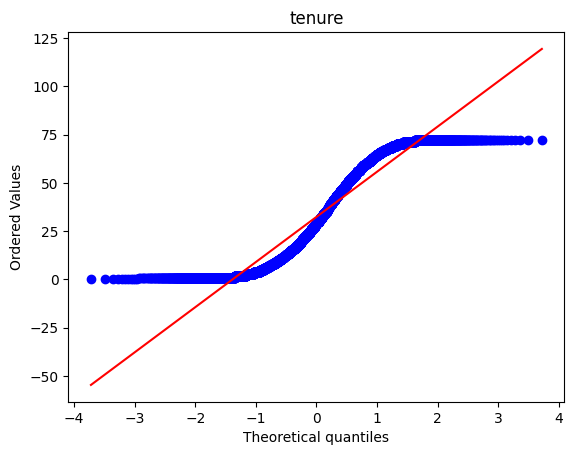



Feature: avg_monthly_gb_download
Unique values: [16 10 30  4 11 73 14  7 21 59 19 12 20 22 17  9  0 52 57 51 41 23 27  2
 69 53 15 29 85 28 18 48 25 26  8  6  5 13 75 82 24 76 47 71 58 42  3 56
 46 39]


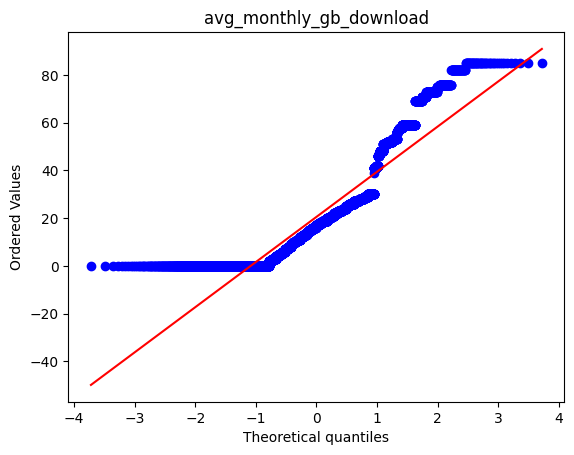



Feature: number_of_referrals
Unique values: [ 2  0  1  3  8  9 10  5  4  7  6 11]


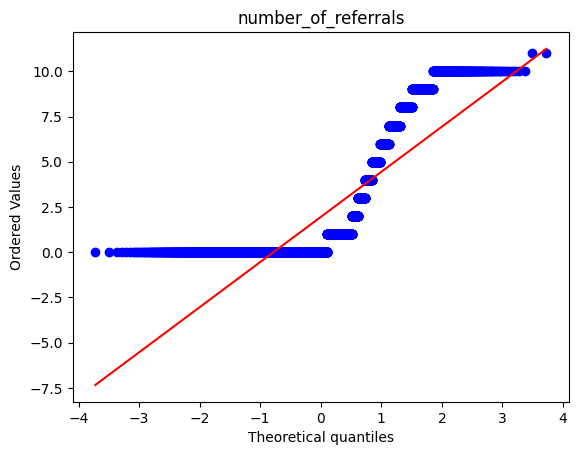



Feature: churn_value
Unique values: [0 1]


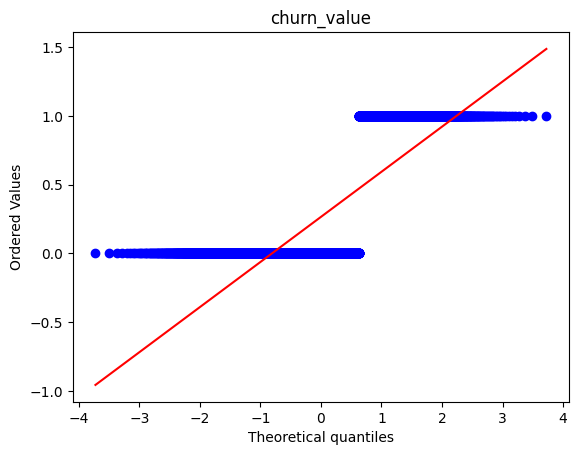

In [35]:
for i in numeric:
    print("Feature:", i)
    print(f"Unique values: {df[i].unique()}")
    probplot(df[i],dist='norm',plot=pylab)
    plt.title(f'{i}')
    plt.show()
    print("\n")

    

In [36]:
print("SKEWNESS\n")
for i in numeric:
    skewness=skew(df[i])
    print(f'{i}:{skewness}')
    if skewness<-0.2:
        print("Negatively Skewed\n")
    elif skewness>0.2:
        print("Positively Skewed\n")
    else:
        print("Slightly Skewed\n")


SKEWNESS

age:0.1621519045783431
Slightly Skewed

number_of_dependents:2.109482586305897
Positively Skewed

total_population:0.9126899283412824
Positively Skewed

monthly_ charges:-0.2204774644391769
Negatively Skewed

avg_monthly_long_distance_charges:0.04916542536235986
Slightly Skewed

total_charges:0.9635858081692212
Positively Skewed

total_refunds:4.3275947700804
Positively Skewed

total_extra_data_charges:4.090337851804683
Positively Skewed

total_long_distance_charges:1.2380182422433934
Positively Skewed

total_revenue:0.9192144427557702
Positively Skewed

tenure:0.23948872998462153
Positively Skewed

avg_monthly_gb_download:1.2163247829087303
Positively Skewed

number_of_referrals:1.4457516284649585
Positively Skewed

churn_value:1.062805029480675
Positively Skewed



# DISTRIBUTION ANALYSIS

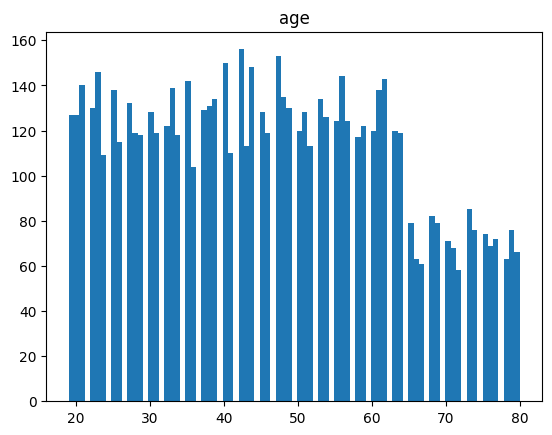

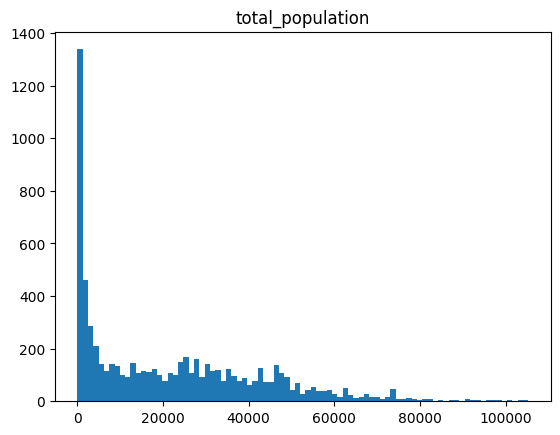

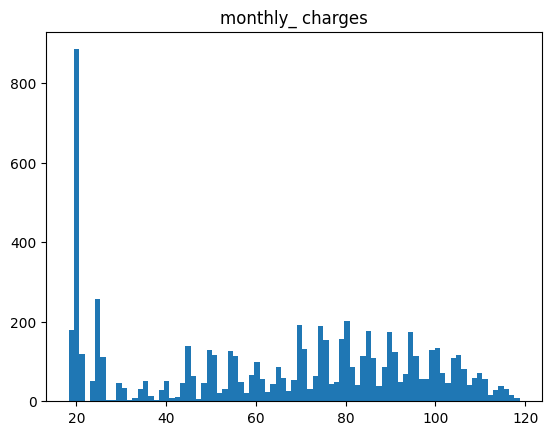

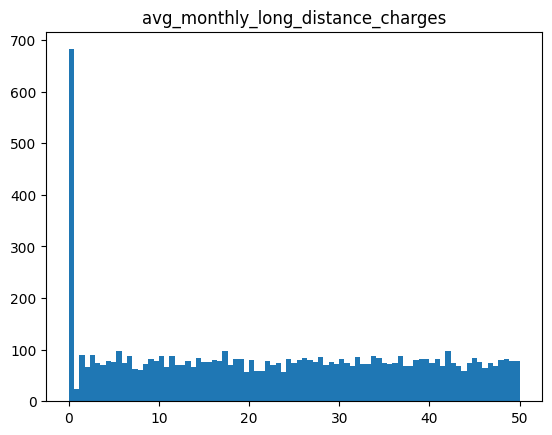

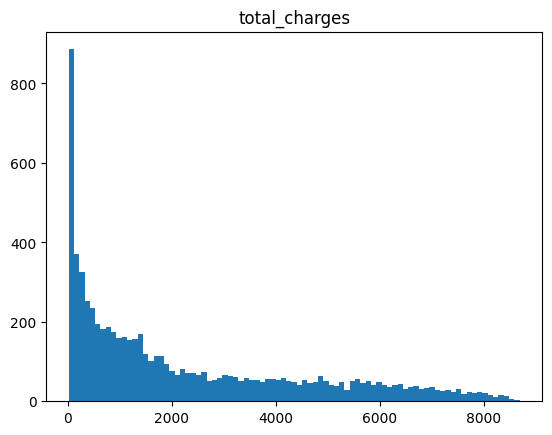

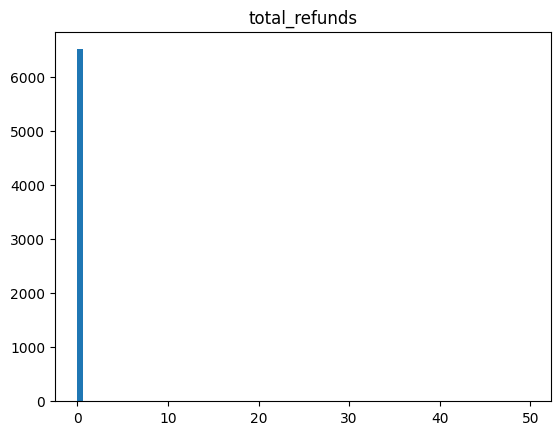

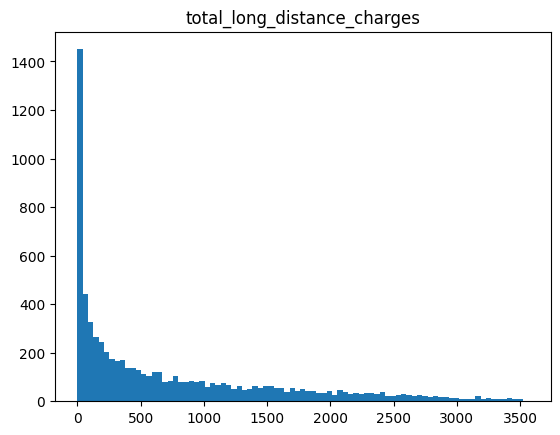

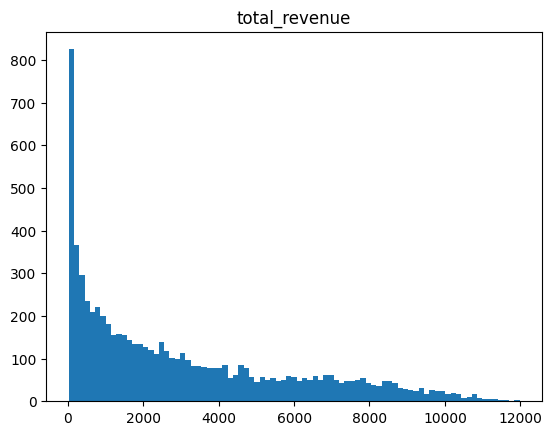

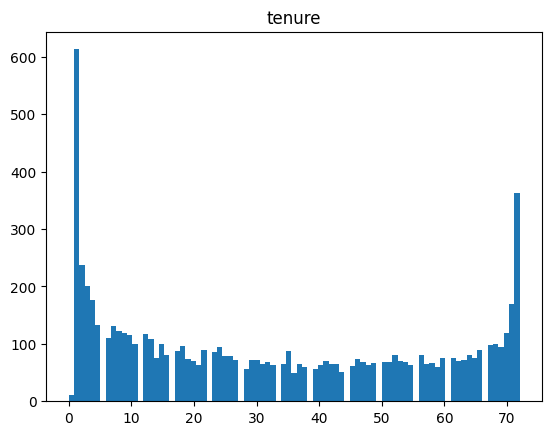

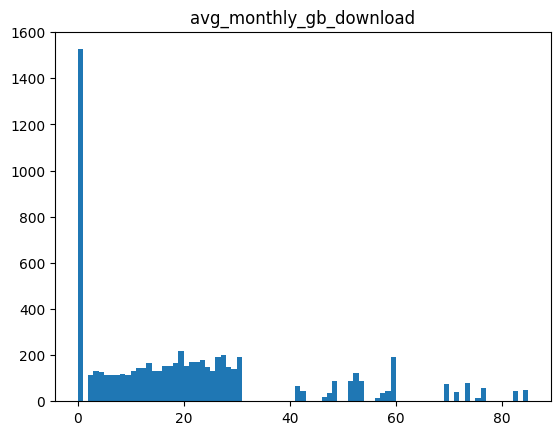

In [37]:
from collections import Counter
continous=['age','total_population', 'monthly_ charges','avg_monthly_long_distance_charges','total_charges','total_refunds', 'total_long_distance_charges','total_revenue','tenure','avg_monthly_gb_download']
for i in continous:
    cnts=Counter(df[i].sort_values())
    keys=cnts.keys()
    vals=cnts.values()
    plt.hist(df[i], bins=85)
    plt.title(i)
    plt.show()

# OUTLIER ANALYSIS

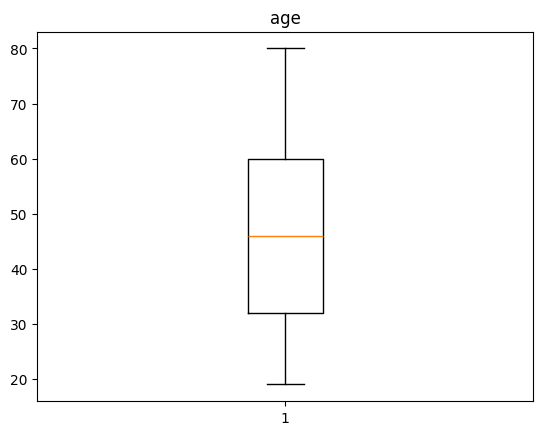

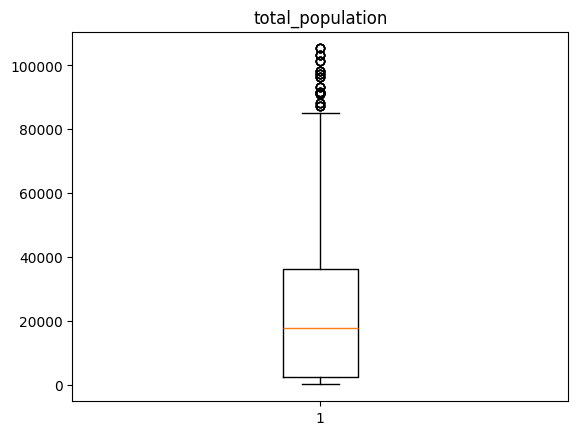

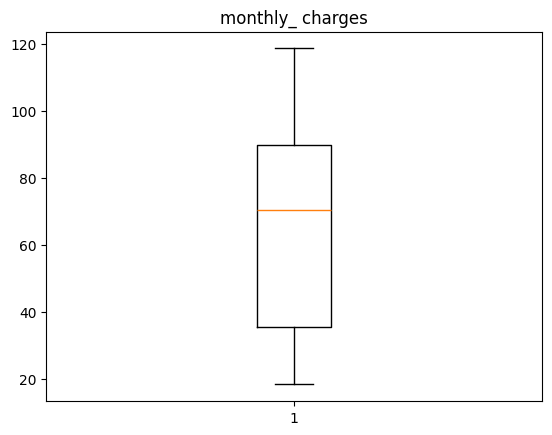

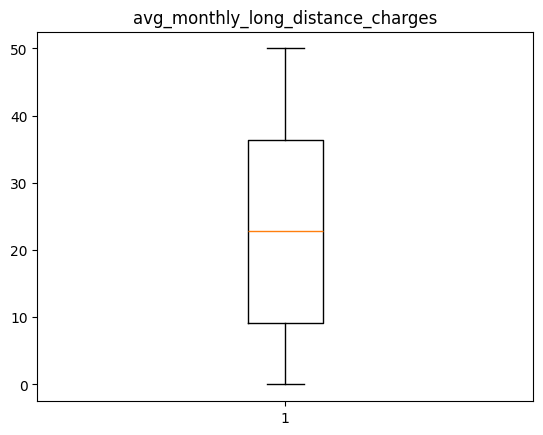

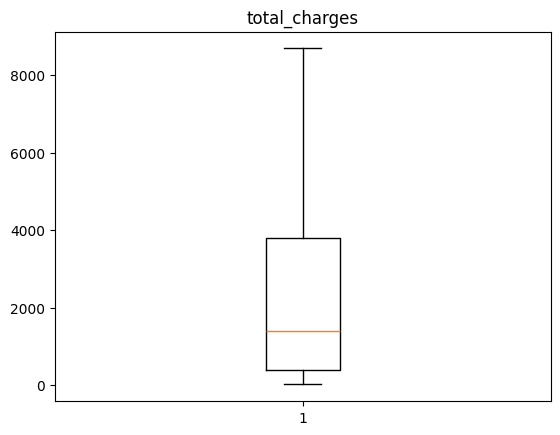

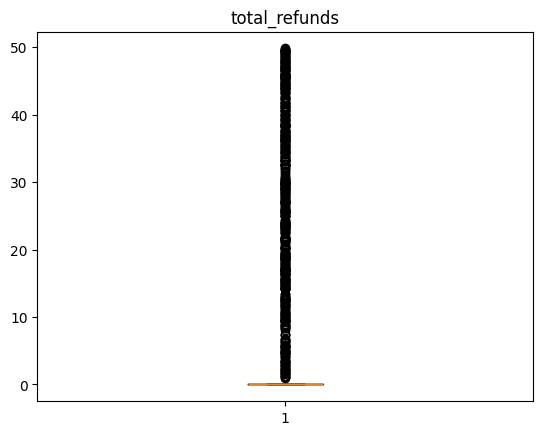

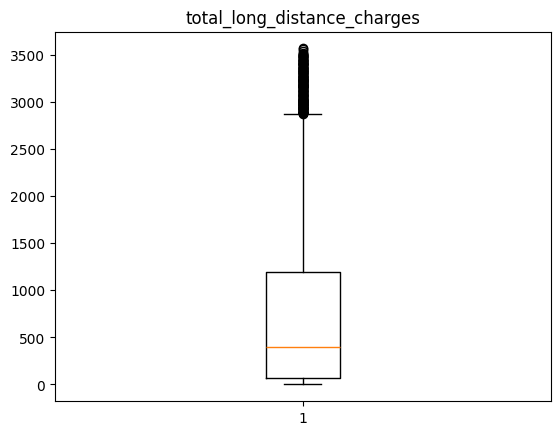

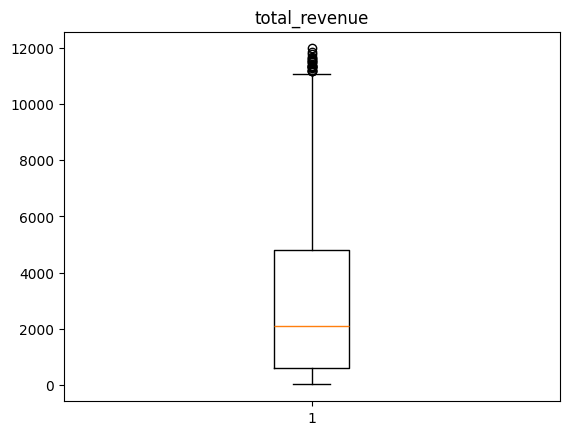

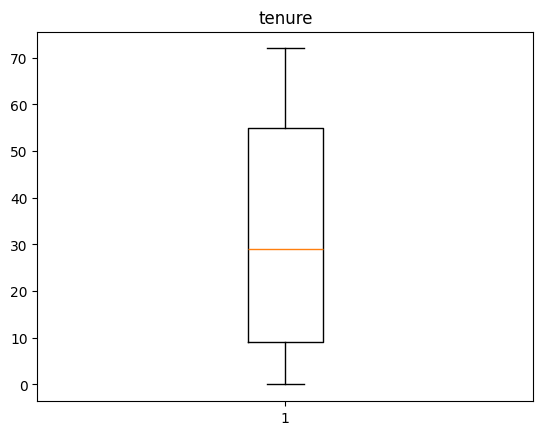

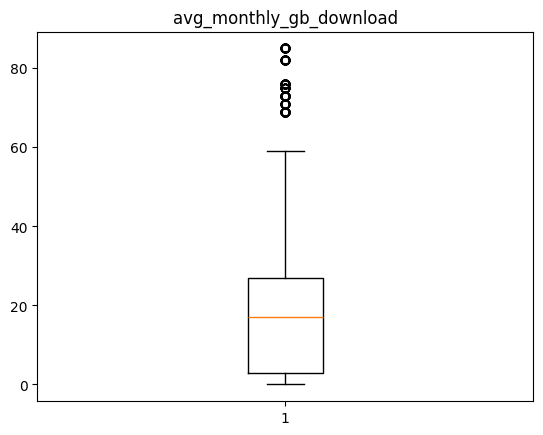

In [38]:
for i in continous:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

# SPEARMAN RANK CORRELATION

In [39]:
only_numeric_df=df.drop(columns=categorical)
numeric_corr=only_numeric_df.corr(method='spearman')
ind=numeric_corr.index
val=numeric_corr['churn_value']
num_features_to_use=[]
for i,j in zip(ind,val):
    if i=='churn_value':
        continue
    if j>0.2 or j<-0.2:
        num_features_to_use.append(i)
print(num_features_to_use)
numeric_corr['churn_value'].sort_values(ascending=False)

['number_of_dependents', 'total_charges', 'total_long_distance_charges', 'total_revenue', 'tenure', 'number_of_referrals']


churn_value                          1.000000
monthly_ charges                     0.184743
avg_monthly_gb_download              0.110684
age                                  0.109779
total_population                     0.055423
total_extra_data_charges             0.044648
avg_monthly_long_distance_charges    0.008458
total_refunds                       -0.039466
total_charges                       -0.231236
number_of_referrals                 -0.232731
total_long_distance_charges         -0.240615
number_of_dependents                -0.246088
total_revenue                       -0.263706
tenure                              -0.367062
Name: churn_value, dtype: float64

# CHI SQUARE TEST

Null hypothesis: feature1 and target feature are independent 

So reject H0 when p value is less than 0.05 

Else accept H0

In [40]:
from scipy.stats import chi2_contingency, f_oneway

def chi_square_test(df, categorical_target, categorical_feature):
    contingency_table = pd.crosstab(df[categorical_target], df[categorical_feature])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return p

dependent_cat_features=[]
print("P values:")
for i in categorical:
    p_value=chi_square_test(df,'customer_status',i)
    if p_value<0.05:
        dependent_cat_features.append(i)
    print(i,chi_square_test(df,'customer_status',i))

print("\nTarget feature is dependent on these features:",dependent_cat_features)

P values:
gender 0.35490117109455394
under_30 2.6017367331106337e-05
senior_citizen 1.1445987367817024e-38
married 2.5743649669241753e-86
city 1.575789257063463e-05
zip_code 1.8989226225626614e-06
phone_service 0.3121079709316997
internet_service 1.5019165169876657e-90
online_security 5.5642666549581354e-74
online_backup 7.812436230432495e-41
device_protection 2.4337813317878154e-48
premium_tech_support 2.4235702677867366e-70
streaming_tv 3.1669062517904404e-37
streaming_movies 9.89543368939128e-38
streaming_music 5.524690220439724e-28
internet_type 9.300117860012577e-58
contract 0.0
paperless_billing 1.261394906561754e-61
payment_method 1.235112767274709e-199
internet_service.1 1.5019165169876657e-90
phone_service.1 0.3121079709316997
multiple_lines 5.4264934564120684e-46
unlimited_data 6.787055959638584e-52
offer 6.982366892336427e-236
referred_a_friend 2.3101079119788114e-80
customer_status 0.0
churn_reason 0.0

Target feature is dependent on these features: ['under_30', 'senior_cit

# MUTUAL INFORMATION FOR CLASSIFICATION 
(For Numerical features only as encoding isnt performed yet)


In [41]:
from sklearn.feature_selection import mutual_info_classif

drop_feat=categorical+['churn_value']
X = df.drop(columns=drop_feat)  
y = df['churn_value']  

In [42]:
mutual_info = mutual_info_classif(X, y)

mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info
}).sort_values(by='Mutual Information', ascending=False)

print(mi_df)

                              Feature  Mutual Information
12                number_of_referrals            0.079324
10                             tenure            0.075538
3                    monthly_ charges            0.046803
8         total_long_distance_charges            0.046257
5                       total_charges            0.043727
1                number_of_dependents            0.040981
9                       total_revenue            0.040263
11            avg_monthly_gb_download            0.034715
2                    total_population            0.022829
0                                 age            0.018776
6                       total_refunds            0.007510
7            total_extra_data_charges            0.005106
4   avg_monthly_long_distance_charges            0.000000


# FEATURE IMPORTANCE (FOR CATEGORICAL FEATURES)
Here Label encoder is applied to categorical features as I plan on using tree models which work well irrespective of the type of encoding (as tree models dont have assumptions such as that higher number means higher importance). But for other methods, One hot encoding must be used. 

Also one hot encoding wouldnt be the best option here due to the presence of huge number of categories.

In [43]:
from sklearn.preprocessing import LabelEncoder
target=df['churn_value']
cat_feat=df[dependent_cat_features].drop(columns='customer_status')
cat_df=pd.concat([cat_feat,target],axis=1)
label_encoders={}

In [44]:
for i in cat_feat.columns:
    le=LabelEncoder()
    cat_feat[i]=le.fit_transform(cat_feat[i])
    label_encoders[i]=le

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
classifier=ExtraTreesClassifier()
classifier.fit(cat_feat,target)

ExtraTreesClassifier()

In [53]:
cat_fea_importance={}
for i,j in zip(classifier.feature_names_in_,classifier.feature_importances_):
    cat_fea_importance[i]=float(j)
sorted_importance = dict(sorted(cat_fea_importance.items(), key=lambda item: item[1], reverse=True))
print(sorted_importance)

{'churn_reason': 0.4784345854493986, 'contract': 0.10915366737796399, 'city': 0.04553031024646507, 'zip_code': 0.04481245577934619, 'payment_method': 0.031784839685403944, 'offer': 0.031306391768463095, 'internet_type': 0.025736738387951597, 'online_security': 0.025350834946704703, 'senior_citizen': 0.021454778750089276, 'premium_tech_support': 0.020609213724013163, 'paperless_billing': 0.017778986747121684, 'internet_service.1': 0.01609333693060669, 'online_backup': 0.014291498013360342, 'multiple_lines': 0.014282136285183591, 'internet_service': 0.013639826667847044, 'device_protection': 0.012976475258206971, 'unlimited_data': 0.012860707271117254, 'streaming_tv': 0.01273000002740866, 'streaming_music': 0.011498776950324505, 'under_30': 0.01121552000875237, 'streaming_movies': 0.009984857425448584, 'married': 0.009795396331751029, 'referred_a_friend': 0.008678665967071661}
